## Ejercicio 1 - Practica 2

In [2]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

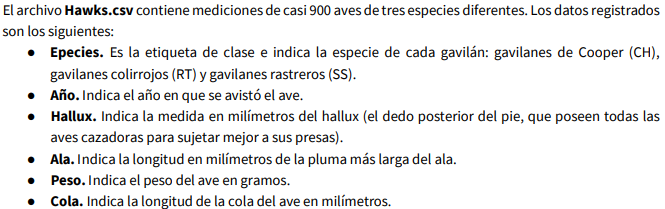

In [3]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos

nombre_archivo = DATOS_DIR + 'Hawks.csv' # archivo de aves

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
#print(df)
display(df)

,Year,Species,Wing,Weight,Tail,Hallux,Coopers?,Red-tailed?,Sharp-shinned?
0,1992,RT,385.0,920.0,219,30.1,0,1,0
1,1992,RT,381.0,990.0,235,31.3,0,1,0
2,1992,CH,265.0,470.0,220,23.5,1,0,0
3,1992,RT,370.0,960.0,212,30.1,0,1,0
4,1992,RT,405.0,1120.0,238,30.2,0,1,0
...,...,...,...,...,...,...,...,...,...
442,2003,RT,362.0,840.0,206,26.1,0,1,0
443,2003,SS,190.0,200.0,157,15.0,0,0,1
444,2003,SS,197.0,185.0,157,15.6,0,0,1
445,2003,RT,360.0,1325.0,224,30.6,0,1,0


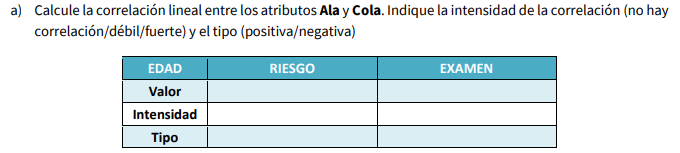

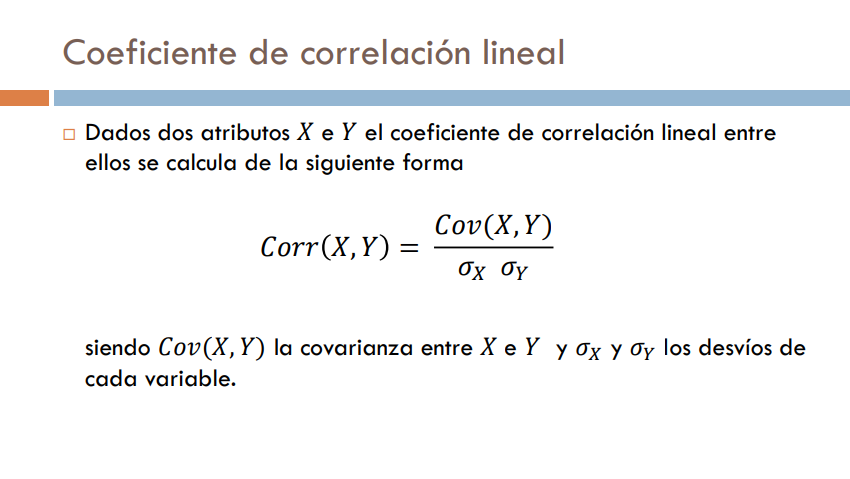
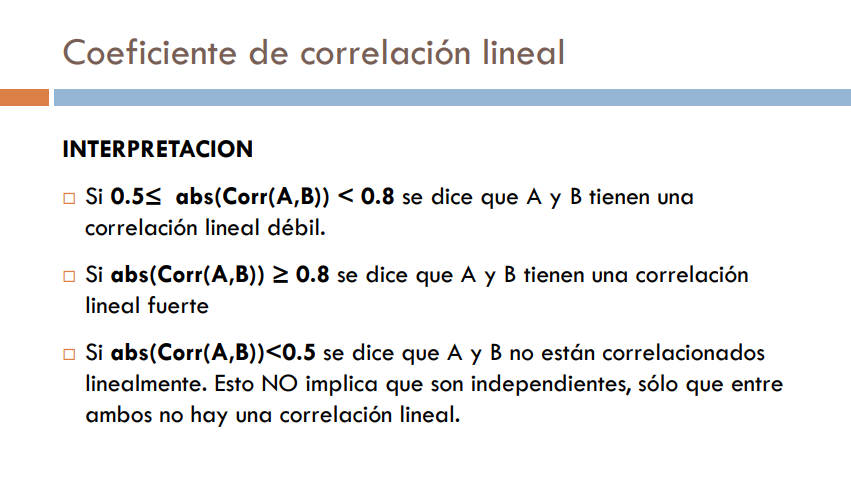

In [10]:
print(df['Tail'].corr(df['Wing']),
df['Tail'].corr(df['Hallux']),
df['Tail'].corr(df['Year']),
df['Tail'].corr(df['Weight']) ,

df['Hallux'].corr(df['Weight']) ,
df['Hallux'].corr(df['Year']) ,
df['Hallux'].corr(df['Wing']) ,


df['Year'].corr(df['Weight']),
df['Year'].corr(df['Wing']),

df['Wing'].corr(df['Weight']),
 )


0.9117653735851508 0.6576956784297728 -0.20512038990746678 0.8861959911107159 0.6896084087145988 -0.14271543020136943 0.6788490044375618 -0.16928144757987 -0.2163231054594916 0.9418050995974135


Al ser 0.9117, podemos decir que la correlacion es fuerte y positiva

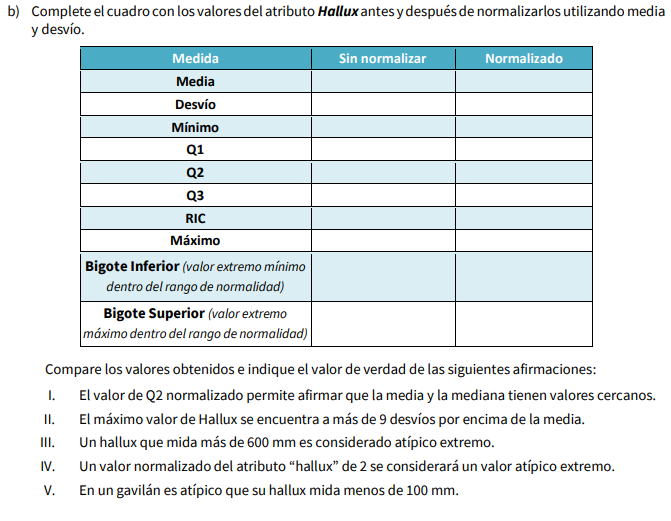

*Antes de normalizarlos:*

In [ ]:
#Cálculo del RIC
Q1 = df["Hallux"].describe()["25%"]
Q2 = df["Hallux"].describe()["50%"]
Q3 = df["Hallux"].describe()["75%"]
RIC = Q3 - Q1

#Calculo de los bigotes
#Definimos los limites inferior y superior para indicar los minimos dentro de ese rango, que seran los bigotes
LI = Q1 - 1.5*RIC
LS = Q3 + 1.5*RIC

valores_en_rango = df[(df["Hallux"] >= LI) & (df["Hallux"] <= LS)]
bigote_inf = valores_en_rango["Hallux"].min()
bigote_sup = valores_en_rango["Hallux"].max()

#an = antes de normalizar
an = {
    "media": df["Hallux"].mean(),
    "desvio": df["Hallux"].std(),
    "minimo": df["Hallux"].min(),
    "Q1": Q1,
    "Q2": Q2,
    "Q3": Q3,
    "RIC": RIC,
    "maximo": df["Hallux"].max(),
    "bigote_inf": bigote_inf,
    "bigote_sup": bigote_sup,
}


*Despues de normalizarlos utilizando media y desvio*

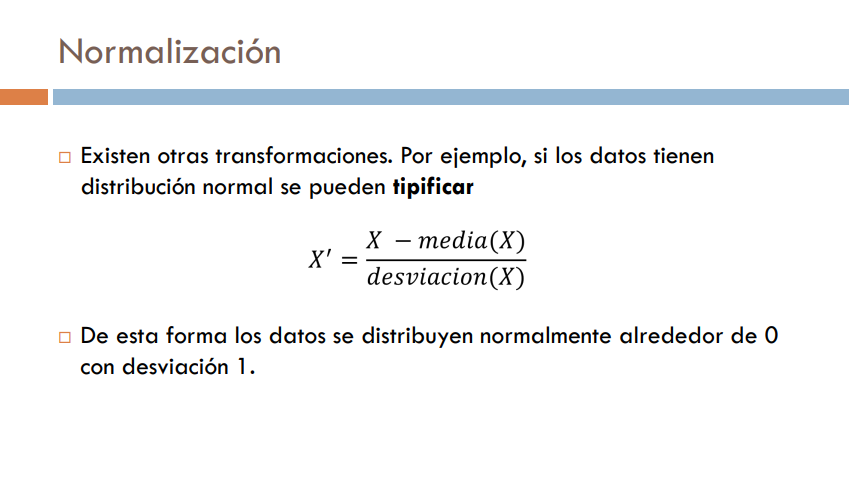

In [ ]:
media = df["Hallux"].mean()
desvio = df["Hallux"].std()

df["Hallux"] = (df["Hallux"] - media) / desvio

Q1 = df["Hallux"].describe()["25%"]
Q2 = df["Hallux"].describe()["50%"]
Q3 = df["Hallux"].describe()["75%"]
RIC = Q3 - Q1

#Calculo de los bigotes
#Definimos los limites inferior y superior para indicar los minimos dentro de ese rango, que seran los bigotes
LI = Q1 - 1.5*RIC
LS = Q3 + 1.5*RIC

valores_en_rango = df[(df["Hallux"] >= LI) & (df["Hallux"] <= LS)]
bigote_inf = valores_en_rango["Hallux"].min()
bigote_sup = valores_en_rango["Hallux"].max()

#n = normalizado
n = {
    "media": df["Hallux"].mean(),
    "desvio": df["Hallux"].std(),
    "minimo": df["Hallux"].min(),
    "Q1": Q1,
    "Q2": Q2,
    "Q3": Q3,
    "RIC": RIC,
    "maximo": df["Hallux"].max(),
    "bigote_inf": bigote_inf,
    "bigote_sup": bigote_sup,
}

In [ ]:
data = {
    "Medida":['Media', 'Desvio', 'Minimo', 'Q1', 'Q2', 'Q3', 'RIC', 'Maximo', 'Bigote Inferior', 'Bigote Superior'],
    "Sin Normalizar":[an["media"], an["desvio"], an["minimo"], an["Q1"], an["Q2"], an["Q3"], an["RIC"], an["maximo"], an["bigote_inf"], an["bigote_sup"]],
    "Normalizado":[n["media"], n["desvio"], n["minimo"], n["Q1"], n["Q2"], n["Q3"], n["RIC"], n["maximo"], n["bigote_inf"], n["bigote_sup"]]
}

tabla = pd.DataFrame(data)
tabla

,Medida,Sin Normalizar,Normalizado
0,Media,25.799441,2.622809e-16
1,Desvio,10.601582,1.000000e+00
2,Minimo,9.600000,-1.528021e+00
3,Q1,15.150000,-1.004514e+00
4,Q2,29.500000,3.490573e-01
5,Q3,31.500000,5.377083e-01
6,RIC,16.350000,1.542223e+00
7,Maximo,130.000000,9.828774e+00
8,Bigote Inferior,9.600000,-1.528021e+00
9,Bigote Superior,44.700000,1.782805e+00


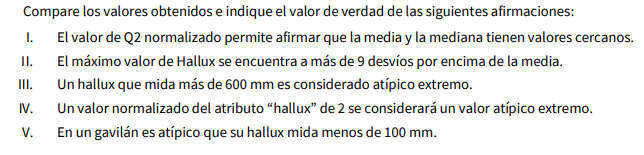



I. FALSO, ya que en una distribución normal, la media y la mediana deberían estar muy cerca. Aquí, la media normalizada es casi 0, mientras que la mediana está más cercana a 0.349. Esto sugiere que la distribución no es perfectamente simétrica y que la media y la mediana no están tan cercanas.

II.VERDADERO, el máximo valor está aproximadamente a 9.83 desviaciones estándar por encima de la media, lo cual es correcto.

III.VERDADERO, el valor de 600 mm está fuera del rango dado (el bigote superior es 44.7 mm), lo que sugiere que es extremadamente atípico.

IV.FALSO, un valor normalizado de 2 está más allá del rango intercuartil, por lo que puede considerarse atípico, pero no necesariamente extremo.

V.FALSO, el valor mínimo es de 9.6 mm, lo cual sugiere que una medida de menos de 100 mm no es atípica sino bastante común para esta muestra.